# Extracting Hi-C graphs using GrapHiC

In [1]:
import pandas as pd
import numpy as np
import math
import glob
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import cooler
from GrapHiC.Graph_creation import nx_graph_from_regions, from_regions, from_sites

For this demo we'll use two Hi-C datasets binned at 10kb resolution from a recent $\textit{Basu et al.}$ study on the effects of knocking out the protein Mbd3, a component of the NuRD protein complex. Knock out (KO) of Mbd3 was shown to significantly decrease the number of long-range contacts while promoting the appearance of smaller sub-TADs within TADs observed in WT.

For now we'll just specify the data paths:

In [7]:
coolerpath ={'WT':'tutorial_data/WT_contacts.cool',
             'KO':'tutorial_data/KO_contacts.cool'
            }

## From regions

One of the key GrapHiC functions is 'from_regions' where we specify a set of regions and chromosomes and GrapHiC extracts the relevant contact information from the Hi-C datasets in question. Below we extract Hi-C graphs for 5 regions on chromosome 2 and 2 regions on chromosome 3, returning a dictionary of graphs.

Graphs are encoded in the same format at Pytorch Geometric data objects (https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-handling-of-graphs) but saved as numpy arrays. Users wanting to convert to PyTorch tensors can manually change the arrays to tensors or use the GrapHiC utility function GrapHiC.utils.misc.ptg_from_numpy

In [8]:
x = from_regions([coolerpath['WT'],coolerpath['KO']],         #paths to cooler files for edge featurisation
                 {'chr2':np.array([[8651256,10658971],        #Specifying region boundaries in chromosome 2, region 1
                                   [10678978,11658978],       #region 2
                                   [12678978,13658978],       #region 3
                                   [14678978,15658978],       #region 4
                                   [16678978,17658978]]),     #region 5
                  'chr3':np.array([[8651256,10658971],        #chromosome 3 region 1
                                   [10678978,11658978]])      #region 2
                 },
                 names = {'chr2': ['Ppp2r2c','reg2'],         #specifying names for the first two regions on chr2
                          'chr3': ['Ppp3r3c','reg4']          #specifying names for the first two regions on chr3
                         },
                 balance = True,                              #specifying whether to balance Hi-C matrices before extracting contact counts
                 join = False,                                #whether to join resulting dictionary of graphs into one graph object
                 backbone = True,                             #whether to force contacts to exist along the chromatin backbone
                 record_backbone_interactions = True,         #whether to explicitely record backbone interactions as an additional edge feature
                 record_cistrans_interactions = False,        #whether to calculate contacts across the interface of two regions (useful if joining region graphs)
                 record_node_chromosome_as_onehot = False     #whether to record a basic node feature as a one-hot encoding of the node chromosome
                )

x

{'chr2': [{'edge_index': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,
            3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
            3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
            4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
            4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
            5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
            6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
            6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
            7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7., 

## From sites

Another key graph creation function is 'from_sites' where we specify a set of sites and chromosomes and GrapHiC extracts only the contact information between the sites in question. Below we extract Hi-C graphs for 5 sites on chromosome 2 and 4 sites on chromosome 3, returning a dictionary of graphs (one for each chromosome).

In [9]:
x, bad_sites = from_sites([coolerpath['WT'],coolerpath['KO']],
                                   {'chr2':np.array([10658971,11658978,13658978,15658978,17658978]),
                                    'chr3':np.array([8651256,10658971,10678978,11658978])
                                   },
                                   names = {'chr2': ['Ppp2r2c','reg2','reg3','reg4','reg5'],
                                            'chr3': ['Ppp3r3c','reg4','reg6','reg7']
                                           },
                                   balance = True, 
                                   join = False,
                                 record_cistrans_interactions = False,
                                   record_node_chromosome_as_onehot = False
                                  )

x

{'chr2': {'edge_index': array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3.,
          3., 3., 3., 3., 4., 4., 4., 4., 4.],
         [0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0.,
          1., 2., 3., 4., 0., 1., 2., 3., 4.]]),
  'edge_attrs': array([[2712.77272927, 4018.63642976],
         [ 133.28623066,   81.23283545],
         [  27.00652527,    9.33411199],
         [  17.87915252,    8.93224231],
         [  17.07365652,   14.69921652],
         [ 133.28623066,   81.23283545],
         [2803.04370359, 4828.43145506],
         [  77.52861992,   39.36935244],
         [  10.6125885 ,   21.5281996 ],
         [  20.80944002,   14.30728914],
         [  27.00652527,    9.33411199],
         [  77.52861992,   39.36935244],
         [2406.6826296 , 4131.52277755],
         [  29.79181969,   21.7532034 ],
         [  12.17012005,   19.27576397],
         [  17.87915252,    8.93224231],
         [  10.6125885 ,   21.5281996 ],
         [  29.79181969

## Networkx graphs

GrapHiC also supports extraction of Hi-C graphs in networkx format which can be useful for conversion to other formats such as Gephi for visualisation. Alternatively, direct analysis can also be performed on Networkx graphs. 

As an example, lets use some utility functions to compare the local graph structure of a gene Ppp2r2c in the Mbd3 WT and Mbd3 KO cases:

In [10]:
def draw_circular(graph, ax, cmap = plt.cm.Blues, weightnorm = None):
    #remove self loops for visualisation purposes
    graph.remove_edges_from(nx.selfloop_edges(graph))
    
    pos = nx.circular_layout(graph)
    #nx.draw_networkx_nodes(graph, pos = pos,node_size=30,ax=ax)
    
    edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

    if weightnorm is None:
        weightnorm = np.percentile(weights,90)
    normalize = mpl.colors.Normalize(vmin=0, vmax=weightnorm)
    for jdx in np.argsort(weights):
        nx.draw_networkx_edges(graph, 
                           pos, 
                           ax = ax,
                           edgelist=[edges[jdx]], 
                           edge_color = cmap(normalize(weights[jdx])), 
                           connectionstyle='arc3,rad=0.3')

    labels = {item[0]: item[1].split(":")[1].split("-")[0] for item in graph.nodes(data='bin_regions') if int(item[0])%20 == 0}
    poslabels = nx.draw_networkx_labels(graph,{key: 1.1*pos[key] for key in pos},labels = labels,ax= ax)
    
    return weightnorm, pos

def highlight_nodes(graph, nodes,ax, pos, **kwargs):
    nx.draw_networkx_nodes(graph, pos = pos,ax=ax, **kwargs)
    
def compare_gene(gene_reg, gene_name):
    gene_intregs = gene_reg.split(":")[1]
    gene_intregs = [int(item.replace(',', '')) for item in gene_intregs.split("-")]
    c = cooler.Cooler(coolerpath['WT'])
    mynodes = c.bins().fetch(gene_reg).index.values

    regions = {
        gene_reg.split(":")[0]: np.array([[gene_intregs[0]-int(4e5),gene_intregs[1]+int(4e5)]])
    }
    chrom = gene_reg.split(":")[0]
    graphs = {cond: nx_graph_from_regions(coolerpath[cond],
                                          regions,
                                          join= True,
                                          force_disjoint = True,
                                          balance = True) for cond in ['WT','KO']}

    fig, ax = plt.subplots(1,2, figsize = (16,8))
    fig.tight_layout()
    for idx in [0,1]:
        ax[idx].spines['left'].set_visible(False)
        ax[idx].spines['right'].set_visible(False)
        ax[idx].spines['top'].set_visible(False)
        ax[idx].spines['bottom'].set_visible(False)
    
    pos = {}
    KO_weightnorm,pos['KO'] = draw_circular(graphs['KO'],
                                        ax[0],
                                        cmap = plt.cm.Reds)
    ax[0].set_title(f"KO contacts\n{graphs['KO'].graph['regions']}\n{gene_name} highlighted",
                size = 15)

    nx.draw_networkx_nodes(graphs['KO'],
                       pos = pos['KO'],
                       ax=ax[0],
                       node_size = 50, 
                       node_color = 'yellow', 
                       nodelist = mynodes)

    WT_weightnorm, pos['WT'] = draw_circular(graphs['WT'],
                                         ax[1],
                                         weightnorm = KO_weightnorm)
    ax[1].set_title(f"WT contacts\n{graphs['WT'].graph['regions']}\n{gene_name} highlighted",
                size = 15)
    nx.draw_networkx_nodes(graphs['WT'],
                       pos = pos['WT'],
                       ax=ax[1],
                       node_size = 50, 
                       node_color = 'yellow', 
                       nodelist = mynodes)

    for idx in [0,1]:
        ax[idx].set_xlim([-1.3,1.2])
        ax[idx].set_ylim([-1.2,1.2])
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])


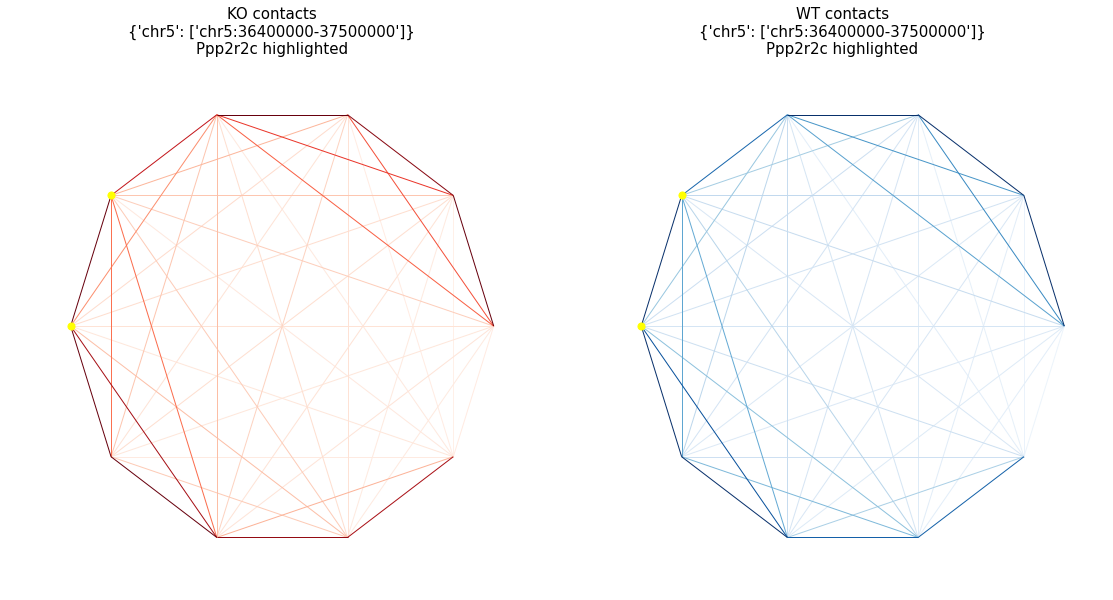

In [11]:
compare_gene(gene_reg = "chr5:36,868,513-36,955,078",gene_name = 'Ppp2r2c')

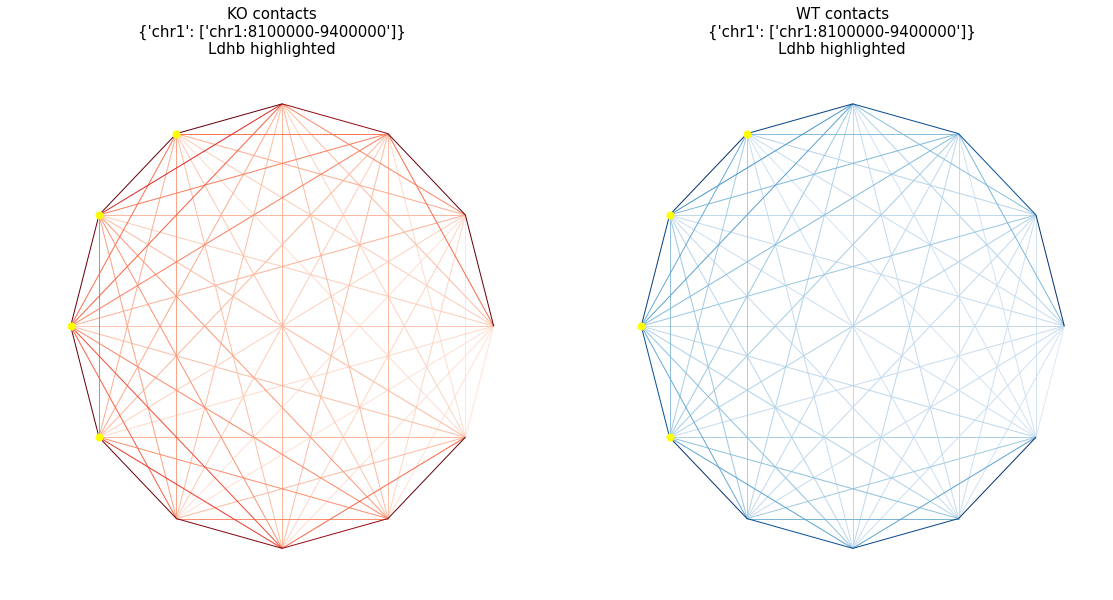

In [12]:
compare_gene(gene_reg = 'chr1:8,500,000-8,900,000',gene_name = 'Ldhb')

We can also just extract the networkx graph directly without the decorative functions around it. 

(NOTE: currently GrapHiC only supports direct extraction of Networkx graphs for single Hi-C datasets. However, conversion of PyTorch geometric fromat graphs to networkx is quite simple and and example can be seen in the make_cis_promoter_enhancer_network.py)

In [13]:
graphs = nx_graph_from_regions(coolerpath['WT'],
                                       {'chr1':np.array([[8100000,9310000],
                                                         [9340000,10110000]]),
                                        'chr2':np.array([[8100000,9310000],
                                                         [9340000,10110000]]),
                                        'chr3':np.array([[8100000,9310000],
                                                         [9340000,10110000]])
                                       },
                               balance = True, 
                               join = True, 
                               force_disjoint = True)



Since we have called join = True, even though we have specified 6 regions on 3 different chromosomes, GrapHiC will return a single graph object. We can quickly get a sense of the overal topology of the graph by drawing it:

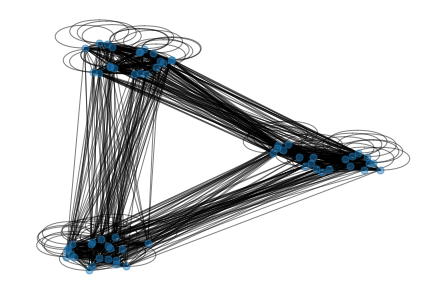

In [14]:
nx.draw(graphs,
        node_size = 50,
        alpha = 0.5)

Unsurprisingly there are 3 major clusters in the graph corresponding to the three chromosomes we specified.

If we instead remove the call for 'join = True' we can return all the graphs as a dictionary and handle them separately:

In [15]:
graphs = nx_graph_from_regions(coolerpath['WT'],
                                       {'chr1':np.array([[8100000,9310000],
                                                         [9340000,10110000]]),
                                        'chr2':np.array([[8100000,9310000],
                                                         [9340000,10110000]]),
                                        'chr3':np.array([[8100000,9310000],
                                                         [9340000,10110000]])
                                       },
                                       balance = True)



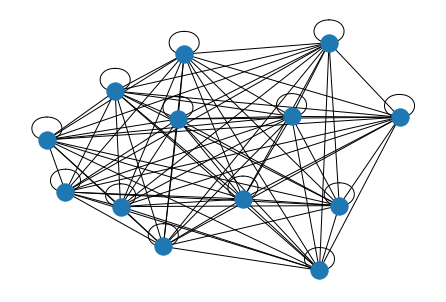

In [16]:
nx.draw(graphs['chr1']['chr1'][0])